<a href="https://colab.research.google.com/github/danamdz/Laboratorio_A01658253/blob/main/mapas%20de%20calor%20y%20box%20plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

cobicho = pd.read_csv("covid19_tweets.csv")
cobicho.head(30)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [ ]:
print(cobicho.shape)
print(("-"*20+"\n")*3)
display(cobicho.info())
print(("-"*20+"\n")*3)
display(cobicho.describe())

(74436, 13)
--------------------
--------------------
--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74436 non-null  object
 1   user_location     59218 non-null  object
 2   user_description  70079 non-null  object
 3   user_created      74436 non-null  object
 4   user_followers    74436 non-null  int64 
 5   user_friends      74436 non-null  int64 
 6   user_favourites   74436 non-null  int64 
 7   user_verified     74436 non-null  bool  
 8   date              74436 non-null  object
 9   text              74436 non-null  object
 10  hashtags          53002 non-null  object
 11  source            74424 non-null  object
 12  is_retweet        74436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 6.4+ MB


None

--------------------
--------------------
--------------------



,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [ ]:
print("Possible values for source  are: \n", cobicho.source.value_counts())

cobi = cobicho[['user_followers','user_friends','user_favourites']]

Possible values for source  are: 
 Twitter Web App               22974
Twitter for Android           16758
Twitter for iPhone            15824
TweetDeck                      3453
Hootsuite Inc.                 2846
                              ...  
Post to Social by SHIFT1          1
PRNewswire                        1
Hep Auto Tweet                    1
Chorus publishing platform        1
Tweecha Lite                      1
Name: source, Length: 450, dtype: int64


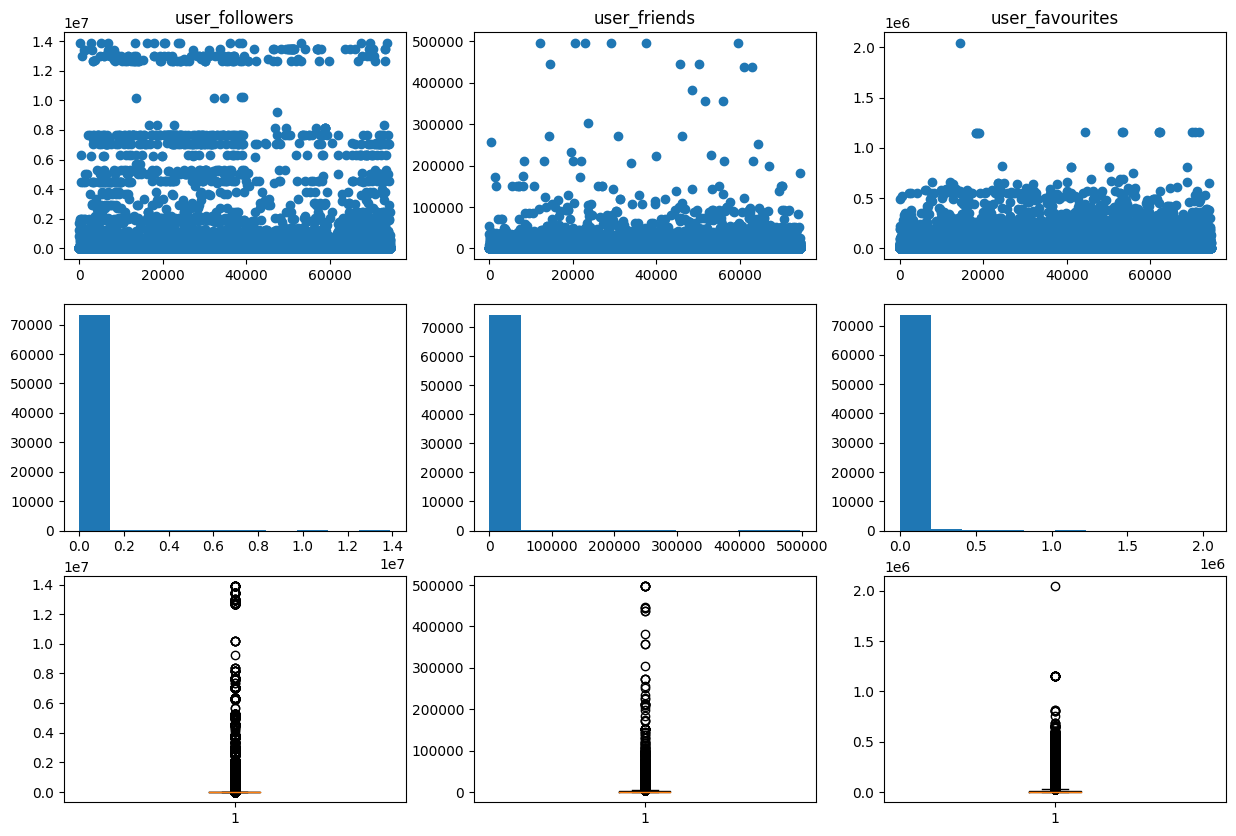

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as sps

def make_descriptive_graphs(df,columns):
  nr = df.shape[0]
  nc = len(columns)
  order = np.arange(nr)
  fig, ax = plt.subplots(3,nc,figsize=(15, 10))
  for i, c in enumerate(columns):
    ax[0,i].set_title(c)
    ax[0,i].scatter(order,df[c])
    ax[1,i].hist(df[c])
    ax[2,i].boxplot(df[c])




make_descriptive_graphs(cobi, cobi.columns)

Outliers for columns user_followers are:
[4, 6, 9, 24, 25, 26, 31, 39, 43, 53, 59, 60, 62, 64, 75, 77, 78, 87, 90, 91, 98, 120, 121, 124, 126, 127, 129, 132, 134, 136, 138, 142, 157, 162, 166, 167, 171, 173, 175, 177, 182, 188, 208, 210, 217, 221, 225, 227, 228, 229, 230, 235, 242, 243, 251, 254, 257, 261, 277, 290, 310, 313, 342, 343, 346, 348, 349, 351, 367, 374, 377, 379, 380, 381, 382, 392, 394, 400, 404, 428, 436, 449, 461, 462, 463, 469, 470, 499, 500, 516, 523, 526, 529, 536, 539, 547, 552, 555, 564, 576, 579, 583, 590, 593, 596, 600, 601, 604, 618, 621, 623, 627, 628, 642, 657, 684, 687, 688, 696, 715, 718, 723, 725, 727, 731, 732, 735, 740, 744, 750, 759, 760, 763, 767, 771, 774, 775, 785, 786, 788, 797, 800, 801, 803, 804, 819, 830, 832, 833, 837, 852, 881, 885, 888, 897, 903, 916, 917, 920, 922, 925, 926, 928, 936, 938, 939, 940, 942, 945, 946, 952, 954, 956, 960, 961, 962, 963, 974, 986, 989, 991, 992, 1007, 1008, 1010, 1014, 1025, 1054, 1072, 1079, 1098, 1099, 1100, 1102, 

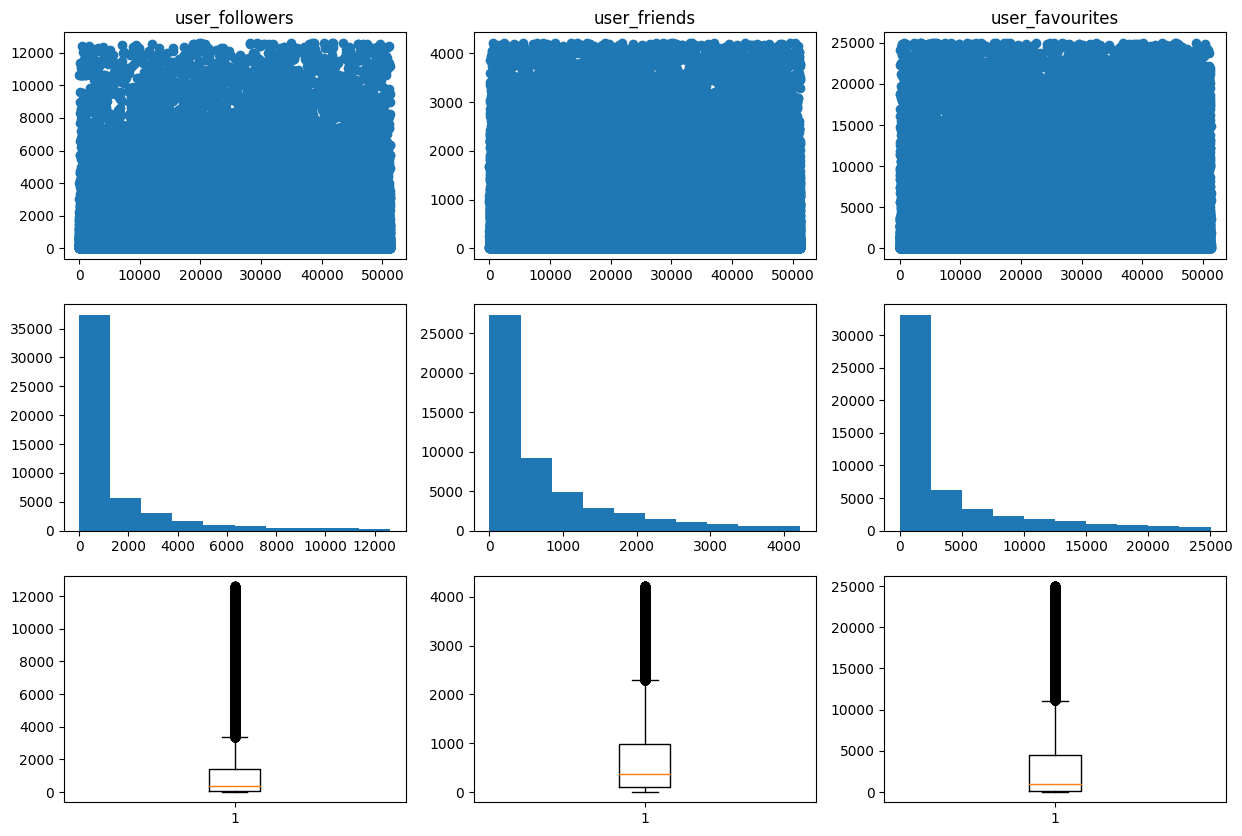

In [ ]:
def remove_outliers(df, columns, show = False):
  all_outliers=[]
  for c in df.columns:
    Q1 = df[c].describe()['25%']
    Q3 = df[c].describe()['75%']
    IQR = Q3 - Q1
    outliers_df= df[(df[c] > Q3 + 1.5*IQR) |
                    (df[c] < Q1 - 1.5*IQR) ]

    outliers_list = list(outliers_df.index)

    if show:
      print(f'Outliers for columns {c} are:')
      print(outliers_list)
      print('---\n'*2)
    all_outliers = all_outliers + outliers_list
  if show:
    print(all_outliers)
    print('The outliers without repetition are:')
  outliers = list(set(all_outliers))
  print(outliers)
  df_without_outliers = df.drop(outliers)
  return df_without_outliers


cobichosinoutliers = remove_outliers(cobi,cobi.columns, show = True)

make_descriptive_graphs(cobichosinoutliers, cobichosinoutliers.columns)

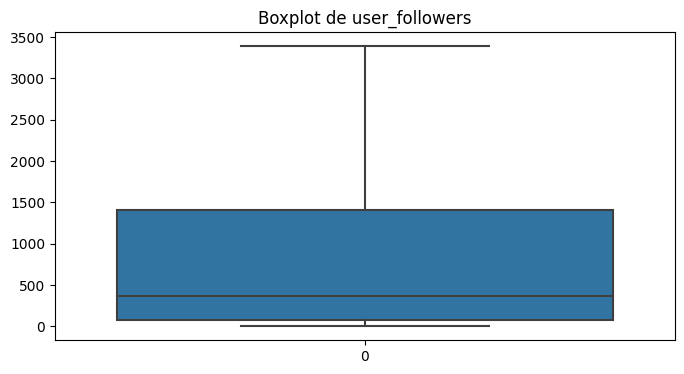

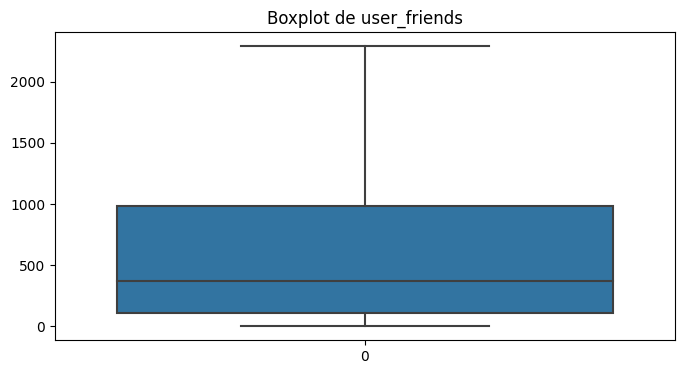

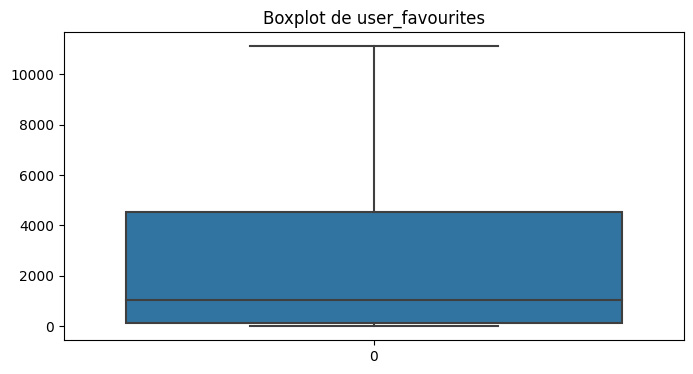

In [ ]:
# Crear una figura para la primera gráfica
plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura según tus necesidades
sns.boxplot(cobichosinoutliers['user_followers'], showfliers=False)
plt.title("Boxplot de user_followers")

# Crear una nueva figura para la segunda gráfica
plt.figure(figsize=(8, 4))
sns.boxplot(cobichosinoutliers['user_friends'], showfliers=False)
plt.title("Boxplot de user_friends")

# Crear una nueva figura para la tercera gráfica
plt.figure(figsize=(8, 4))
sns.boxplot(cobichosinoutliers['user_favourites'], showfliers=False)
plt.title("Boxplot de user_favourites")

# Mostrar las gráficas por separado
plt.show()

In [ ]:
cobi.corr()

,user_followers,user_friends,user_favourites
user_followers,1.000000,-0.002722,-0.028724
user_friends,-0.002722,1.000000,0.207825
user_favourites,-0.028724,0.207825,1.000000


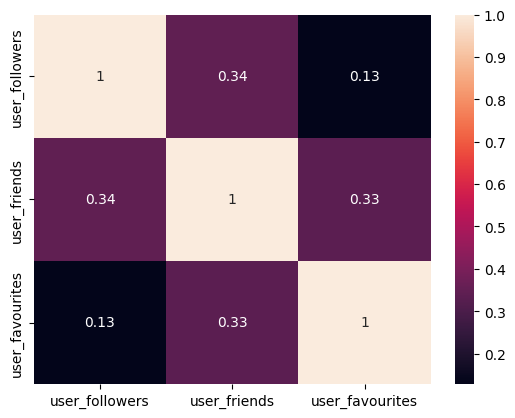

In [ ]:

sns.heatmap(cobichosinoutliers.corr(),annot=True);

* ¿Hay alguna variable que no aporta información?

Nosotros pensamos que las variables: user_name, user_loaction, user_description e is_retweet.

* Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Las variables que eliminaríamos serían: user_name, user_loaction, user_description y el is_retweet, ya que no aportan información relevante o caracteristicas para que puedan ser estudiadas facilmente, es decir no hay patrones que podamos estudiar


* ¿Existen variables que tengan datos extraños?
  
Sí, las variables user_friends, user_followers y user_favourites tienen outliers, nos damos cuenta en el el diagrama de bigotes; sin embargo, los quitamos con la función "remove_outliers"


* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

Los valores no se encuentran en un rango similar, lo que tiene un impacto en el desempeño de los modelos. Hay algunos que si se parecen, por ejrmplo el de user_favourites y user friends

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Si, de acuerdo con la evaluación de k-means realizada anteriormente y las distribuciones de las variables analizadas en esta tarea, se pueden identificar dos categorías: una con un bajo número de amigos y seguidores, y otra con pocos amigos pero una gran cantidad de seguidores.

### **Equipo** - Integrantes

Santiago Calderón Ortega A01663888

Manuel Antonio Morales Gonzalez A01664652

Danna Mendoza Palacios Roji A01658253